## Часть 1. Приоритизация гипотез.

Импортируем библиотеки, которые понадобятся нам для дальнейшего анализа. Заодно немного предобработаем данные.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import scipy.stats as stats

In [5]:
df = pd.read_csv('/datasets/hypothesis.csv')

In [6]:
df

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [7]:
df.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [8]:
pd.options.display.max_colwidth = 150

Для того чтобы грамотно приоритизировать гипотезы, в первую очередь найдём показатель ICE(влияние, уверенность, усилия)

In [9]:
df['ice'] = (df['impact'] * df['confidence']) / df['efforts']

In [10]:
df[['hypothesis', 'ice']].round(1).sort_values(by = 'ice',ascending = False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


Впереди оказались гипотезы 8,0 и 7. Посмотрим, будут ли эти гипотезы занимать также лидирующие позиции, если теперь найдём показатель RICE, который включает в себя количество пользователей, которых затронет нововведение.

In [11]:
df['rice'] = (df['reach'] * df['impact'] * df['confidence']) / df['efforts']

In [12]:
df[['hypothesis', 'rice']].round(1).sort_values(by = 'rice', ascending = False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


#### Показатели ICE и RICE находятся по формулам ниже, для наглядности:

$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

### Вывод

Судя по показателю ICE, проверять нужно сначала 8, затем 0 и 7 гипотезы. В тоже время судя по показателю RICE, сначала необходимо проверить в первую очередь гипотезу под номером 7, затем 2, 0 и 6 гипотезы. Восьмая гипотеза тем временем спустилась на пятую строчку. Это связано с тем, что показатель RICE учитывает параметр под названием Reach, который означает количество пользователей, которое подвергнется изменению после нововведений. Очевидно, что акция с днём рождением затронет очень малое количество пользователей.

## Часть 2. Анализ A/B теста.

Взглянем на датасеты и немного предобработаем их

In [13]:
orders = pd.read_csv('/datasets/orders.csv')

In [14]:
visitors = pd.read_csv('/datasets/visitors.csv')

In [15]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [17]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [18]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [19]:
orders['date'] = orders['date'].astype('datetime64')

In [20]:
visitors['date'] = visitors['date'].astype('datetime64')

In [21]:
orders.columns = ['order_id', 'user_id', 'date', 'revenue', 'group']

### 1) Построим график кумулятивной выручки по группам

Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий и объединим таблицы

In [22]:
dates_groups = orders[['date', 'group']].drop_duplicates()

In [23]:
orders_aggregated = dates_groups\
.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'order_id' : 'nunique', 'user_id' : 'nunique', 'revenue' : 'sum'}),
       axis=1).sort_values(by=['date','group'])

In [24]:
visitors_aggregated = dates_groups\
.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [25]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [26]:
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Построим графики кумулятивной выручки по группам A/B-тестирования

In [27]:
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

In [28]:
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

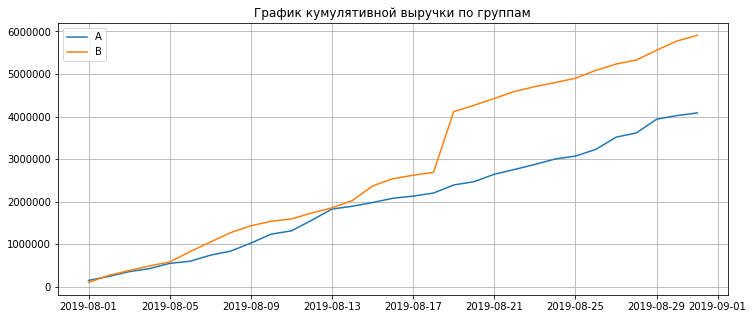

In [69]:
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')

plt.plot(cumulative_revenue_A['date'], cumulative_revenue_B['revenue'], label='B')

plt.legend()

plt.title('График кумулятивной выручки по группам')

plt.rcParams["figure.figsize"] = [24,5]

plt.grid()

Где то в середине группа B резко вырвалась вперёд и продолжает расти. Выброс может быть связан с большой суммой заказа, либо с увеличением количества заказов. В целом, выручка продолжила расти дальше и это говорит о том, что возможно выброс ни как не повлияет на результат эксперимента.

### 2) Построим график кумулятивного среднего чека

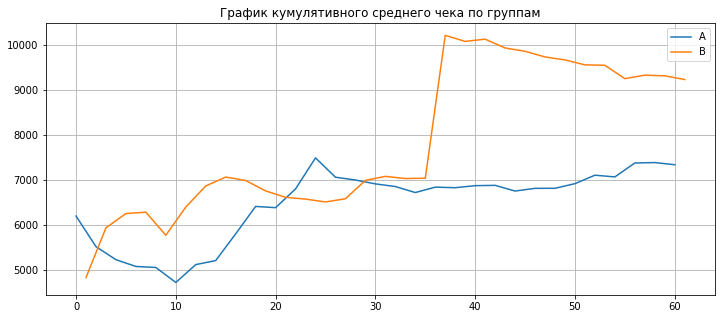

In [30]:
plt.plot(cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')

plt.plot(cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')

plt.legend()

plt.title('График кумулятивного среднего чека по группам')

plt.grid()

В начале группы A и B постоянно колеблются и только под конец начинают немного выравниваться. Правда при этом группа B резко возрастает. Такое смещение вполне могло исказить средний чек. Поэтому этот выброс нужно будет проанализировать дополнительно.

### 3) Построим график относительного изменения кумулятивного среднего чека группы B к группе A

In [31]:
merge_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, left_on='date', right_on='date', how='left', 
                                                   suffixes=['A', 'B'])

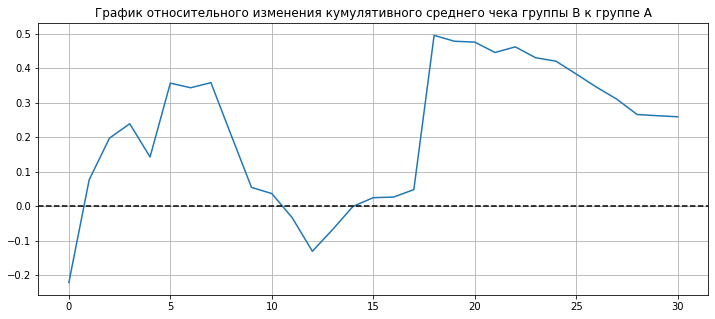

In [32]:
plt.plot((merge_cumulative_revenue['revenueB']/merge_cumulative_revenue['ordersB'])
         /(merge_cumulative_revenue['revenueA']/merge_cumulative_revenue['ordersA'])-1)

plt.axhline(y = 0, color = 'black', linestyle = '--')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

plt.grid()

По графику видно, что он скачет в нескольких местах. Это значит, что в покупках есть крупные заказы и выбросы.

### 4) Построим график кумулятивной конверсии по группам

In [33]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

In [34]:
cumulative_data_A = cumulative_data[cumulative_data['group']=='A']

In [35]:
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']

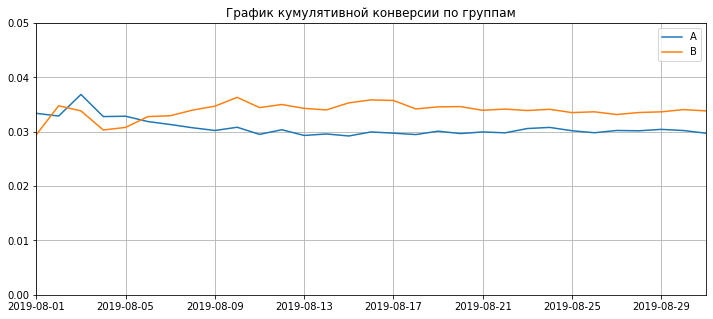

In [36]:
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.legend()

plt.axis(['2019-08-01', '2019-08-31', 0, 0.05])

plt.title('График кумулятивной конверсии по группам')

plt.grid()

При приближении осей в начале теста видны колебания обеих групп, но затем графики постепенно выравниваются и фиксируются у одного значения. При этом сегмент B больше сегмента A.

### 5) Построим график относительного изменения кумулятивной конверсии группы B к группе A

In [37]:
merge_cumulative_conversions = cumulative_data_A[['date','conversion']]\
.merge(cumulative_data_B[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

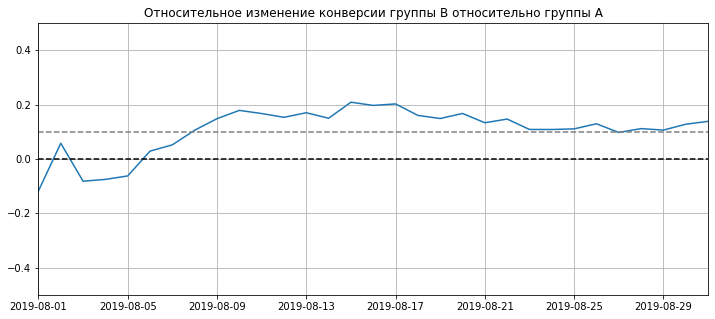

In [38]:
plt.plot(merge_cumulative_conversions['date'], 
         merge_cumulative_conversions['conversionB']/merge_cumulative_conversions['conversionA']-1)

plt.title('Относительное изменение конверсии группы B относительно группы A')

plt.axhline(y= 0, color='black', linestyle='--')
plt.axhline(y= 0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])

plt.grid()

Почти с самого начала группа B лидирует по конверсии. Доходит до 20% и затем падает и фиксируется на показателе прироста около 10-15%.

Сейчас самое время взглянуть на аномалии, которые могут искажать результаты теста.

### 6) Построим точечный график количества заказов по пользователям

In [39]:
orders_by_users = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('user_id', as_index = False)\
.agg({'order_id' : 'nunique'})

In [40]:
orders_by_users.columns = ['user_id','orders']

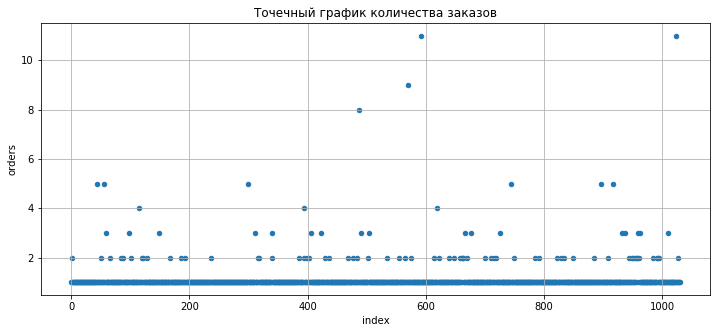

In [41]:
orders_by_users.reset_index().plot(kind = 'scatter', grid = True, x = 'index', y = 'orders',
                                   title = 'Точечный график количества заказов')

Пользователей, которые заказывали более двух раз, не так много.

### 7) Посчитаем 90-й, 95-й и 99-й перцентили количества заказов на пользователя

In [42]:
np.percentile(orders_by_users['orders'], [90,95,99])

array([1., 2., 4.])

Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей - больше четырёх заказов.

### 8) Построим точечный график стоимостей заказов

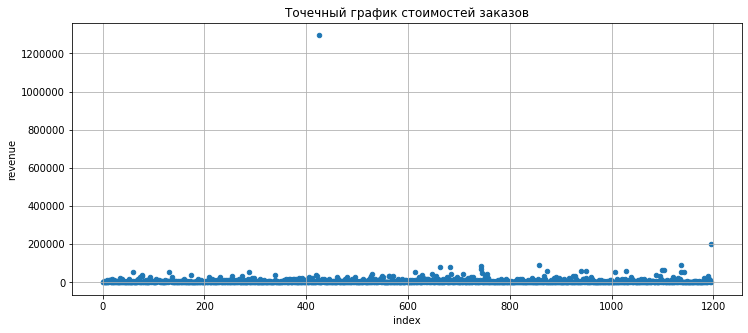

In [43]:
orders.reset_index().plot(kind = 'scatter', x = 'index', y = 'revenue', grid = True, 
                          title = 'Точечный график стоимостей заказов')

На графике отчётливо видно аномально высокий заказ стоимостью выше 1250000, а также выброс в районе 200000

### 9) Посчитаем 90-й, 95-й и 99-й перцентили стоимости заказов

In [44]:
np.percentile(orders['revenue'], [90,95,99])

array([18168. , 28000. , 58233.2])

Не более чем у 5% пользователей чек дороже 28000. Чек в 58233 - не больше чем у 1% клиентов

### 10) Посчитаем статистическую значимость различий в конверсии между группами без удаления аномальных пользователей

In [45]:
orders_by_users_A = orders[orders['group']=='A'].groupby('user_id', as_index=False).agg({'order_id' : 'nunique'})

In [46]:
orders_by_users_A.columns = ['user_id', 'orders']

In [47]:
orders_by_users_B = orders[orders['group']=='B'].groupby('user_id', as_index=False).agg({'order_id' : 'nunique'})

In [48]:
orders_by_users_B.columns = ['user_id', 'orders']

In [49]:
visitors_daily_A = visitors[visitors['group']=='A'][['date', 'visitors']]

In [50]:
visitors_daily_A.columns = ['date', 'visitors_per_date_A']

In [51]:
visitors_daily_B = visitors[visitors['group']=='B'][['date', 'visitors']]

In [52]:
visitors_daily_B.columns = ['date', 'visitors_per_date_B']

In [53]:
sample_A = pd.concat([orders_by_users_A['orders'],
                      pd.Series(0, index=np.arange(visitors_daily_A['visitors_per_date_A'].sum() - 
                                                   len(orders_by_users_A['orders'])), name='orders')],axis=0)

In [54]:
sample_B = pd.concat([orders_by_users_B['orders'],
                      pd.Series(0, index=np.arange(visitors_daily_B['visitors_per_date_B'].sum() - 
                                                   len(orders_by_users_B['orders'])), name='orders')],axis=0)

Перед началом теста, сформулируем нулевую и альтернативную гипотезу. Нулевая гипотеза звучит так: статистически значимых различий в конверсии между группами нет.
Альтернативная гипотеза в свою очередь звучит так: статистически значимые различия в конверсии между группами присутствуют

За альфу возьмём значение в 0.05. Тест будем проводить по методу Манна - Уитни. Если в результате значение окажется меньше альфы - то отвергнем нулевую гипотезу.

In [55]:
stats.mannwhitneyu(sample_A, sample_B)[1].round(3)

0.008

In [56]:
(sample_B.mean()/sample_A.mean()-1).round(3)

0.138

Судя по тесту, получившееся значение гораздо меньше альфы, поэтому отвергаем нулевую гипотезу. Между группами есть статистически значимые различия. Относительный прирост конверсии группы B к группе A составляет 14%.

### 11) Посчитаем статистическую значимость различий в среднем чеке заказа между группами без удаления аномальных значений

Перед началом теста, сформулируем нулевую и альтернативную гипотезу. Нулевая гипотеза звучит так: статистически значимых различий в среднем чеке между группами нет.
Альтернативная гипотеза в свою очередь звучит так: статистически значимые различия в среднем чеке между группами присутствуют

In [57]:
stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1].round(3)

0.365

In [58]:
(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean()-1).round(3)

0.259

P-value значительно больше альфы. Это значит, что с вероятностью в 37%, статистически значимых различий между группами не будет. Нулевую гипотезу не отвергаем. Кроме того, относительное различие среднего чека между группами составляет 26%. Это говорит о том, что средний чек группы B значительно выше среднего чека группы A.


### 12) Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным, с удалением аномальных значений

Среди количества заказов, за аномальные примем больше двух заказов, а среди стоимости за аномальные заказы примем стоимость больше 30000

In [59]:
users_with_many_orders = pd.concat([orders_by_users_A[orders_by_users_A['orders'] > 2]['user_id'],
                                    orders_by_users_B[orders_by_users_B['orders'] > 2]['user_id']], axis = 0)

In [60]:
users_with_expensive_orders = orders[orders['revenue'] > 30000]['user_id']

In [61]:
bad_users = pd.concat([users_with_many_orders, users_with_expensive_orders], axis = 0).drop_duplicates().sort_values()

In [62]:
len(bad_users)

68

Всего 68 аномальных пользователей. Теперь взглянем на то, как они повлияли на результаты теста. Сначала подготовим данные

In [63]:
sample_new_A = pd.concat([orders_by_users_A[np.logical_not(orders_by_users_A['user_id'].isin(bad_users))]['orders'],
                          pd.Series(0, index=np.arange(visitors_daily_A['visitors_per_date_A'].sum() - 
                                                       len(orders_by_users_A['orders'])),name='orders')],axis=0)

In [64]:
sample_new_B = pd.concat([orders_by_users_B[np.logical_not(orders_by_users_B['user_id'].isin(bad_users))]['orders'],
                          pd.Series(0, index=np.arange(visitors_daily_B['visitors_per_date_B'].sum() - 
                                                       len(orders_by_users_B['orders'])),name='orders')],axis=0)

Теперь проведём аналогичный тест и найдём статистически значимое различие в конверсии между группами, только уже с очищенными данными от аномалий

In [65]:
stats.mannwhitneyu(sample_new_A, sample_new_B)[1].round(3)

0.007

In [66]:
(sample_new_B.mean()/sample_new_A.mean()-1).round(3)

0.172

Результаты по конверсии практически не изменились. Отвергаем нулевую гипотезу.

### 14) Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным, с удалением аномальных значений

In [67]:
stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['user_id'].isin(bad_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['user_id'].isin(bad_users)))]['revenue'])[1].round(3)

0.36

In [68]:
(orders[np.logical_and(orders['group']=='B',np.logical_not
                      (orders['user_id'].isin(bad_users)))]['revenue'].mean() / orders[np.logical_and(orders['group']=='A',
                    np.logical_not(orders['user_id'].isin(bad_users)))]['revenue'].mean() - 1).round(3)

-0.023

P-value среднего чека без аномалий равен такому же значению, как и с аномалиями. При этом относительный прирост среднего чека группы B к группе A упал до нуля и стал отрицательным. Это говорит о том, что после очистки данных, средний чек группы B стал меньше группы A. Нулевую гипотезу о том, что между группами нет статистически значимых различий в среднем чеке - не отвергаем. 

## Вывод

- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.


- По сырым данным нет статистически значимого различия по среднему чеку между группами, как и после фильтрации аномалий, но при этом относительный прирост упал до отрицательного.


- График различия конверсии между группами показал, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.

Несмотря на присутствие различий в конверсии между двумя группами, цель A/B теста - увеличение выручки. По среднему чеку как раз наблюдается отсутствие различий между группами. Конверсия в группе B лучше группы A, но при этом выручка никак не изменилась и местами стала хуже после очищения данных от аномалий. Исходя из этого принимаем решение об остановке эксперимента и признании его неудачным.